In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
path = './data/raw_data.csv'
df = pd.read_csv(path)
df.head()

,Phone_Number,Poster,No_Bedroom,No_Bathroom,No_Livingroom,Area,Apartment_Type,Project,Investor,Floor,Furniture_Type,FURNITURE,Convenient,Price,Url,Raw_Description,Entities,Location,Latitude,Longitude
0,098285***,môi giới,3.0,2.0,1.0,80.0,tập thể,NaN,NaN,3.0,NaN,"['có_điều hoà', ' nóng lạnh', ' giường', ' tủ'...",[],7.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,chính chủ cho thuê căn hộ 3 mặt thoáng tại vĩn...,"[['<unk> phúc tiện', 'LOC'], ['80', 'AREA'], [...","Vĩnh Phúc, Ba Đình, Hà Nội, Vietnam",21.041731,105.809950
1,088833***,cá nhân,2.0,1.0,NaN,48.0,chung_cư,NaN,NaN,NaN,NaN,[],"['trường', 'đại_học', 'bệnh_viện']",7.5,https://nha.chotot.com/ha-noi/quan-dong-da/thu...,"cho thuê căn hộ chung cư chính chủ, mặt đường...","[['căn_hộ chung_cư', 'APART'], ['đường phạm ng...","P.Phạm Ngọc Thạch, Đống Đa, Hà Nội, Vietnam",21.008615,105.834091
2,098441***,cá nhân,1.0,1.0,NaN,40.0,tập_thể chung_cư,NaN,NaN,NaN,NaN,[],"['ngõ rộng', 'bệnh_viện']",5.0,https://nha.chotot.com/ha-noi/quan-hai-ba-trun...,"chính chủ cho thuê căn hộ tập thể 8/3 nhà a6, ...","[['căn_hộ tập_thể', 'APART'], ['nhà a6, tầng 1...","104 A6 Phố 8/3, Quỳnh Mai, Hai Bà Trưng, Hà Nộ...",20.999548,105.860602
3,091552***,môi giới,1.0,1.0,NaN,30.0,studio,NaN,NaN,NaN,nội thất đầy đủ,"['điều_hoà', 'giường tủ', 'nóng lạnh', 'bàn bế...",['trung_tâm thương_mại'],4.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,studio 25m2 tại ngõ 118 đào tấn\nnhà full nội ...,"[['studio', 'APART'], ['25m2', 'AREA'], ['ngõ ...","Đào Tấn, Ba Đình, Hà Nội, Vietnam",21.032594,105.808742
4,091552***,môi giới,1.0,1.0,NaN,30.0,chung_cư,NaN,NaN,2.0,nội thất đầy đủ,"['điều_hoà', ' giường tủ', 'nóng lạnh', ' bàn ...","['xe để dưới hầm free', 'cổng khoá vân tay', '...",4.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,cho thuê căn hộ dịch vụ đủ đồ giá chỉ 4tr5 ở đ...,"[['căn_hộ dịch_vụ', 'APART'], ['45 ở đào', 'PR...","Ng. 12 Phố Đào Tấn, Cống Vị, Ba Đình, Hà Nội, ...",21.033861,105.809472


In [12]:
df.rename(columns={'FURNITURE': 'Furniture'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16916 entries, 0 to 16915
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phone_Number     16840 non-null  object 
 1   Poster           16916 non-null  object 
 2   No_Bedroom       16764 non-null  float64
 3   No_Bathroom      10843 non-null  float64
 4   No_Livingroom    3945 non-null   float64
 5   Area             16916 non-null  object 
 6   Apartment_Type   12151 non-null  object 
 7   Project          12650 non-null  object 
 8   Investor         0 non-null      float64
 9   Floor            5596 non-null   float64
 10  Furniture_Type   10944 non-null  object 
 11  Furniture        16916 non-null  object 
 12  Convenient       16916 non-null  object 
 13  Price            16740 non-null  object 
 14  Url              16916 non-null  object 
 15  Raw_Description  16684 non-null  object 
 16  Entities         16916 non-null  object 
 17  Location    

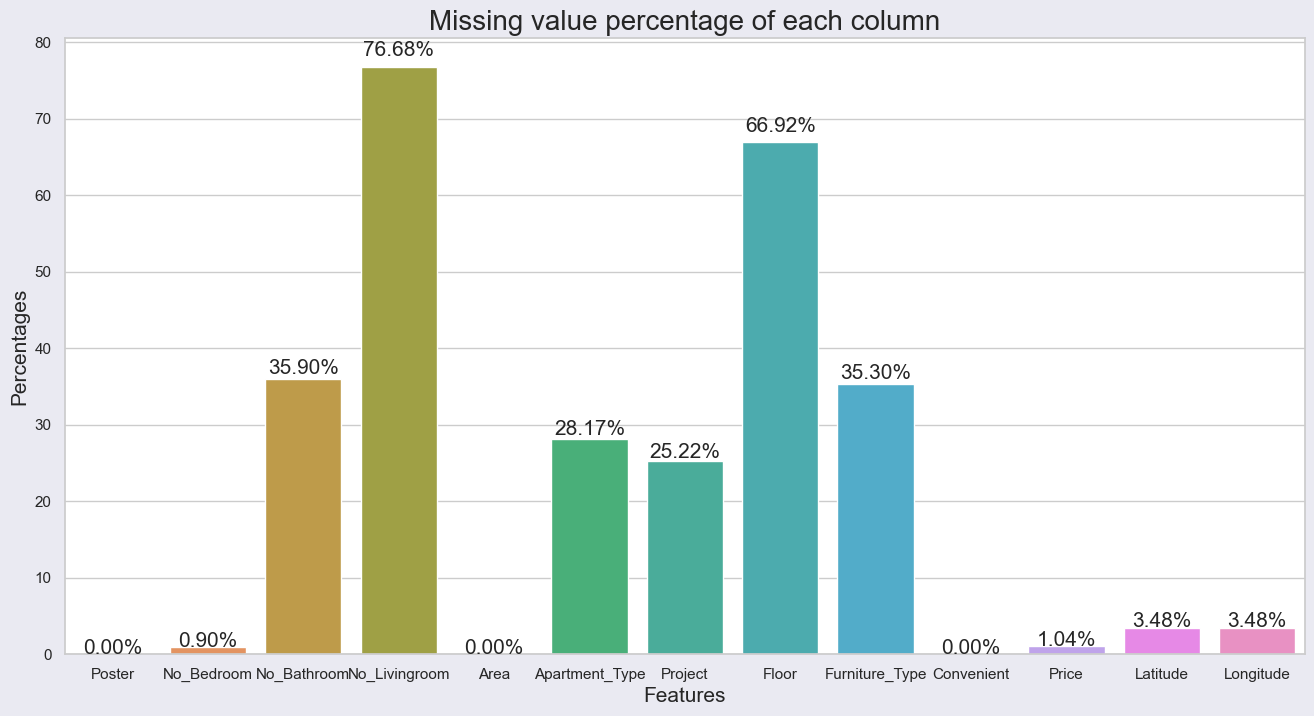

In [16]:
# visualize percentage of missing value
def missing_percent(df):
    nan_percent= 100 * (df.isnull().sum()/len(df))
    # nan_percent= nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['Investor', 'Phone_Number', 'Raw_Description', 'Location', 'Furniture', 'Convinient', 'Entities', 'Url']:
    bar_x.append(x[0])
    bar_y.append(x[1])

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Missing value percentage of each column', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

## Furniture feature

In each feature, I will visualize to get insight of the feature, then take account into some processes to clean data, handle missing value, instead of split project into separate steps such as: EDA, Data Preprocess,...

In [18]:
df['Furniture_Type'].isnull().sum()

5972

Text(0, 0.5, 'Furniture_Type')

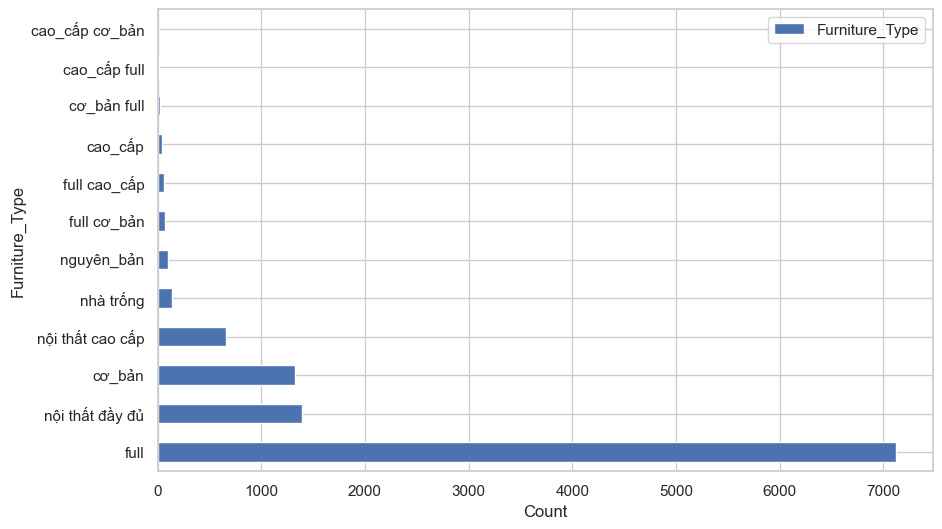

In [26]:
df['Furniture_Type'].value_counts().to_frame().plot.barh(figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Furniture_Type')

# cao_cấp cơ_bản == basic luxury
# cao_cấp full == full luxury
# cơ_bản full == full basic
# cao_cấp == luxury
# full cao_cấp == cao_cấp full == full luxury
# full cơ_bản == cơ_bản full == full basic
# nguyên_bản == origin
# nhà trống == empty
# nội thất cao cấp == luxury
# cơ_bản == basic
# nội thất đầy đủ  == full
# Some duplicate furniture type in the dataset i.e. full cao_cấp == cao_cấp full, full cơ_bản == cơ_bản full, ...

In [28]:
# normalize furniture type into consistent list
for i in range(df.shape[0]):
  temp = str(df.iloc[i]['Furniture_Type'])
  if temp == 'cơ_bản' or temp == 'cơ bản' or temp == 'full cơ_bản' or temp == 'full cơ bản' or temp == 'cơ_bản full':
      df['Furniture_Type'][i] = 'cơ bản'
  if temp == 'nhà trống':
      df['Furniture_Type'][i] = 'nguyên bản'
  if temp == 'nguyên_bản' or temp == 'nguyên bản':
      df['Furniture_Type'][i] = 'nguyên bản'
  if temp == 'nội thất cao cấp' or temp == 'full cao_cấp' or temp == 'cao_cấp' or temp == 'cao_cấp full' or temp == 'cao_cấp cơ_bản':
      df['Furniture_Type'][i] = 'full cao cấp'
  if temp == 'nội thất đầy đủ':
      df['Furniture_Type'][i] = 'full'

In [29]:
# raw description contains a lot of information. So, we can extract some information about furniture type from them
for i in range(df.shape[0]):
  if isinstance(df.iloc[i]['Furniture_Type'], float):
    temp = str(df.iloc[i]['Entities']) + str(df.iloc[i]['Raw_Description']) + str(df.iloc[i]['Project'])
    if 'cơ_bản' in temp or 'cơ bản' in temp or 'full cơ_bản' in temp or 'full cơ bản' in temp or 'cơ_bản full' in temp:
        df['Furniture_Type'][i] = 'cơ bản'
    elif 'nhà trống' in temp:
        df['Furniture_Type'][i] = 'nguyên bản'
    elif 'nguyên_bản' in temp or 'nguyên bản' in temp:
        df['Furniture_Type'][i] = 'nguyên bản'
    elif 'nội thất cao cấp' in temp  or 'full cao_cấp' in temp or 'cao_cấp' in temp or 'cao_cấp full' in temp or 'cao_cấp cơ_bản' in temp:
        df['Furniture_Type'][i] = 'full cao cấp'
    elif 'nội thất đầy đủ' in temp:
        df['Furniture_Type'][i] = 'full'

In [32]:
# fill missing value by "unk" value
df['Furniture_Type'].fillna('unk', inplace=True)

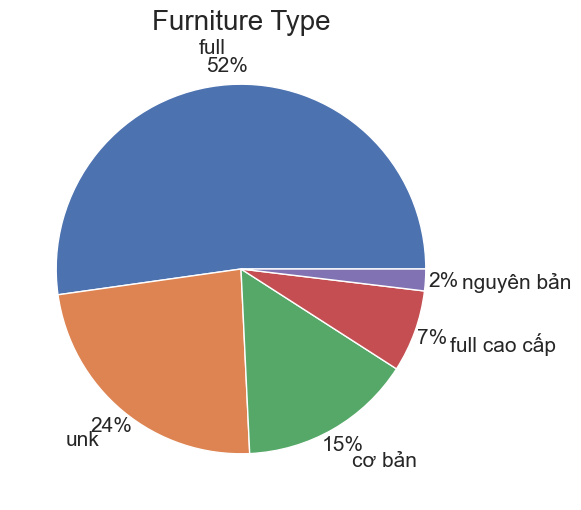

In [34]:
plt.subplots(figsize=(10,6))
df['Furniture_Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, fontsize=15)
plt.axis('off')
plt.title('Furniture Type', fontsize=20)
plt.show()

## Area and Price Feature

In [37]:
# unit of price: million vietnamdong
# unit or area: square meter
# there are some text values in area and price feature
# so, need to process to extract number from the text values

import string
punc = list(string.punctuation.replace(',','').replace('.','') + 'abcdefghyklmnopqrstuvwxyz')
for i in range(df.shape[0]):
    if any(p in str(df['Area'][i]) for p in punc):
        print(df['Area'][i])
        #drop wrong label
        df['Area'] = df['Area'].drop(index=i)
for i in range(df.shape[0]):
    if any(p in str(df['Price'][i]) for p in punc):
        print(df['Price'][i])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
['8,5 triệuthá', 'PRICE']
nan
['7,5 triệu', 'PRICE']
nan
nan
['9xx/ngày', 'PRICE']
['8.25 k/m2/', 'PRICE']
['2.5 tr - 4.5 tr/tháng', 'PRICE']
['2.5 tr - 4.5 tr/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
['8 triệu đến 16 triệu/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
nan
nan
['17 ~ triệ', 'PRICE']
nan
['4tr5 đến 6tr', 'PRICE']
['5 - 12 triệu/', 'PRICE']
nan
['15 triệu/tháng', 'PRICE']
['9 triệu/tháng.', 'PRICE']
nan
['5.5 triệu/thá', 'PRICE']
['8.25 k/m2/', 'PRICE']
['2.5 tr - 4.5 tr/tháng', 'PRICE']
['2.5 tr - 4.5 tr/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
['8 triệu đến 16 triệu/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
nan
nan
['17 ~ triệ', 'PRICE']
nan
['4tr5 đến 6tr', 'PRICE']
['5 - 12 triệu/', 'PRICE']
nan
['15 triệu/tháng', 'PRICE']
['9 triệu/tháng.', 'PRICE']
nan
['5.5 triệu/thá', 'PRICE']
['6,5 triệutháng', 'PRICE']
nan
nan
['23 tr/', 'PRICE']
['7,8 triệu/thá', 'PRICE']
['7 

In [38]:
import re
def convert_obj_to_float(df, field):
    form = "[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?"
    for i in range(df.shape[0]):
        if isinstance(df[field][i], str):
            temp = re.findall(form, df[field][i].replace(',','.').replace('m2','').replace(' tr ','.').replace('tr','.').replace('00.000','.'))
            if not len(temp):
                df[field] = df[field].drop(index=i)
            else:
                temp_ = 0.0
                for t in temp:
                    temp_ += float(t[0])
                df[field][i] = temp_/len(temp)
        if isinstance(df[field][i], int):
            df[field][i] = float(df[field][i])
    df[field] = df[field].astype('float')
convert_obj_to_float(df, 'Price')
convert_obj_to_float(df, 'Area')

In [41]:
df['Price'].isnull().sum()

192

In [42]:
df['Area'].isnull().sum()

16

In [45]:
df[['Price', 'Area']].describe()

,Price,Area
count,16724.000000,16900.000000
mean,58.358730,74.482237
std,6226.249488,33.162276
min,0.625000,1.000000
25%,6.500000,50.000000
50%,9.000000,72.000000
75%,12.000000,93.000000
max,805194.333333,826.000000


Text(0.5, 1.0, 'Box plot of price')

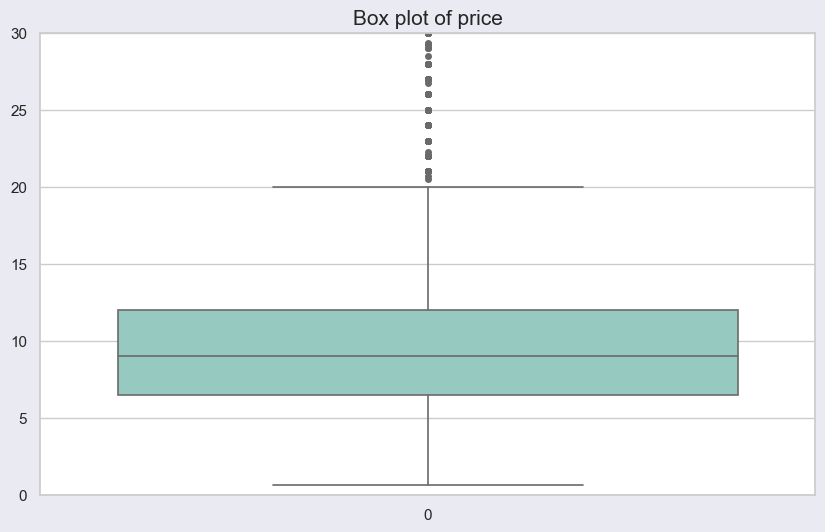

In [61]:
# visualize boxplot of price
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

ax = sns.boxplot(data=df['Price'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 30))
ax.set_title('Box plot of price', fontsize=15)

Text(0.5, 1.0, 'Box plot of Area')

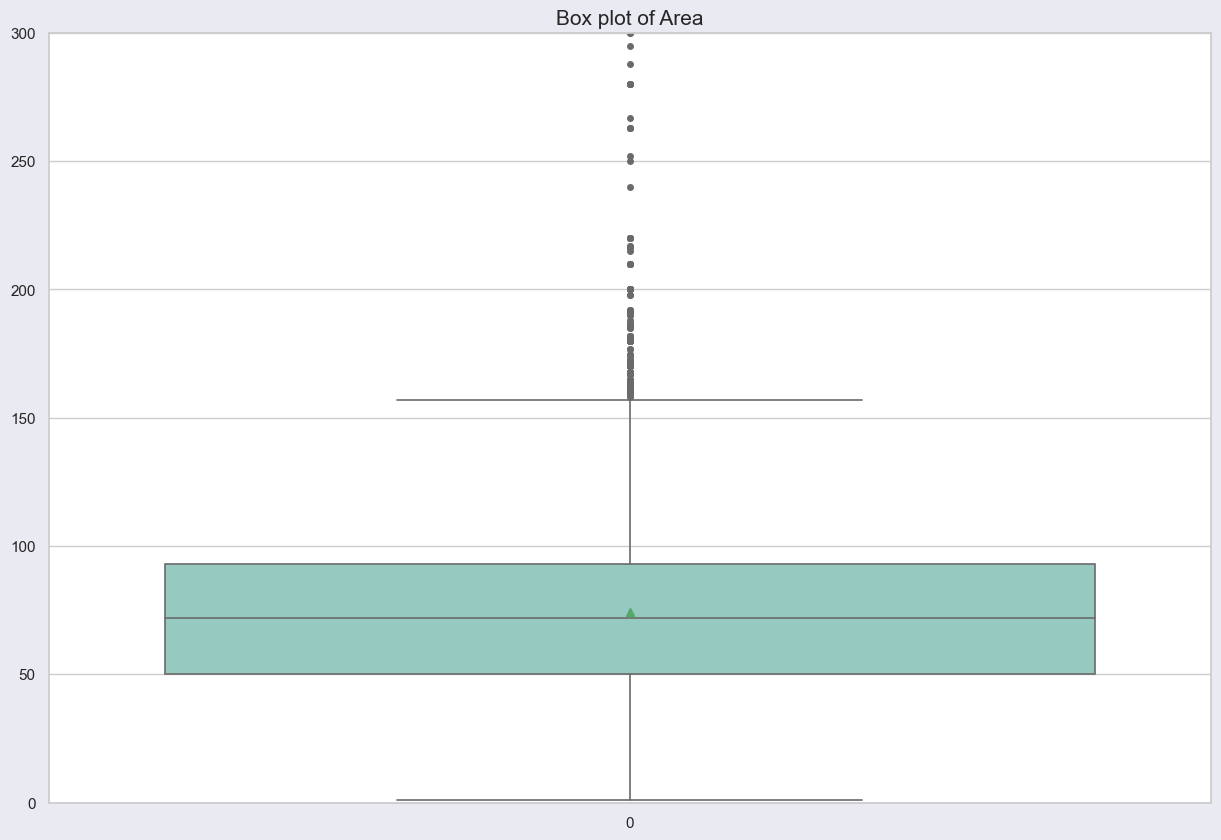

In [63]:
#  visualize boxplot of area feature
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

ax = sns.boxplot(data=df['Area'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 300))
ax.set_title('Box plot of Area', fontsize=15)

## Apartment_Type Feature

Text(0, 0.5, 'Apartment_Type')

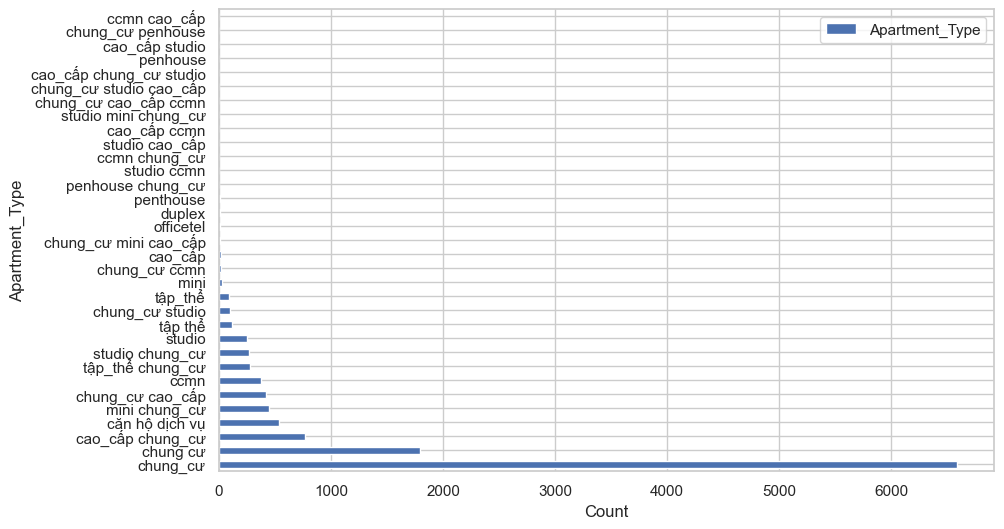

In [44]:
df['Apartment_Type'].value_counts().to_frame().plot.barh(figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Apartment_Type')

# Some duplicate apartment type in the dataset

In [47]:
print(df['Apartment_Type'].unique())

['tập thể' 'chung_cư' 'tập_thể chung_cư' 'studio' 'ccmn' 'căn hộ dịch vụ'
 'mini chung_cư' 'chung cư' 'studio chung_cư' 'chung_cư cao_cấp'
 'chung_cư studio cao_cấp' 'mini' 'penthouse' 'chung_cư ccmn' 'duplex'
 'studio mini chung_cư' nan 'tập_thể' 'cao_cấp' 'penhouse chung_cư'
 'chung_cư mini cao_cấp' 'cao_cấp chung_cư' 'officetel' 'cao_cấp ccmn'
 'studio cao_cấp' 'studio ccmn' 'chung_cư cao_cấp ccmn' 'chung_cư studio'
 'cao_cấp chung_cư studio' 'penhouse' 'cao_cấp studio' 'ccmn chung_cư'
 'chung_cư penhouse' 'ccmn cao_cấp']


In [49]:
# normalize apartment type into consistent list
# chung cư cao cấp == luxury apartment
# chung cư studio == studio apartment
# chung cư mini == mini apartment
# chung cư tập thể == collective apartment
# chung cư thường == normal apartment
for i in range(df.shape[0]):
    if 'duplex' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư cao cấp'
    elif 'officetel' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư cao cấp'
    elif 'studio' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư studio'
    elif 'penhouse' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư cao cấp'
    elif 'mini' in str(df['Apartment_Type'][i]) or 'ccmn' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư mini'
    elif 'tập_thể' in str(df['Apartment_Type'][i]) or 'tập thể' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư tập thể'
    else:
        df['Apartment_Type'][i] = 'chung cư thường'

In [50]:
df['Apartment_Type'].value_counts()

chung cư thường     14887
chung cư mini         891
chung cư studio       625
chung cư tập thể      488
chung cư cao cấp       25
Name: Apartment_Type, dtype: int64

In [52]:
df['Apartment_Type'].isna().sum()

0

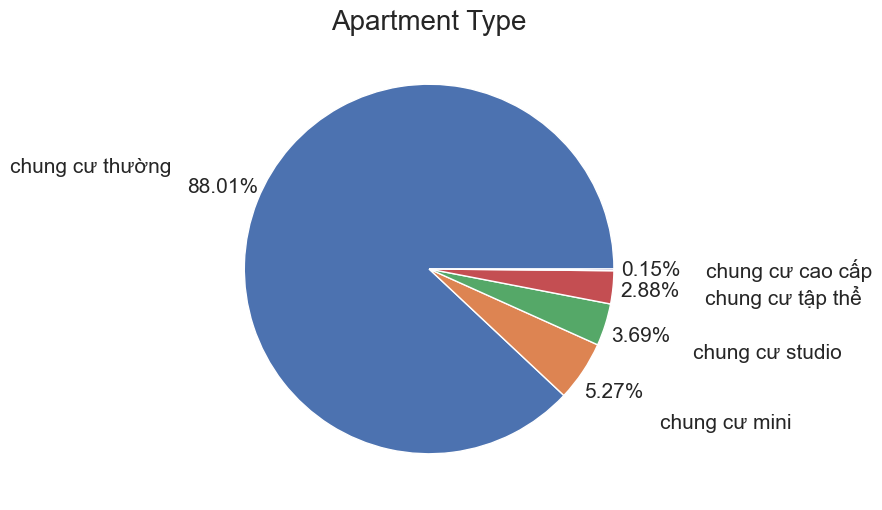

In [53]:
plt.subplots(figsize=(10,6))
df['Apartment_Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.5, fontsize=15)
plt.axis('off')
plt.title('Apartment Type', fontsize=20)
plt.show()

## No Room Feature

In [56]:
print(df['No_Bedroom'].isnull().sum())

print(df['No_Bathroom'].isnull().sum())

print(df['No_Livingroom'].isnull().sum())

152
6073
12971


## Process Coordinates

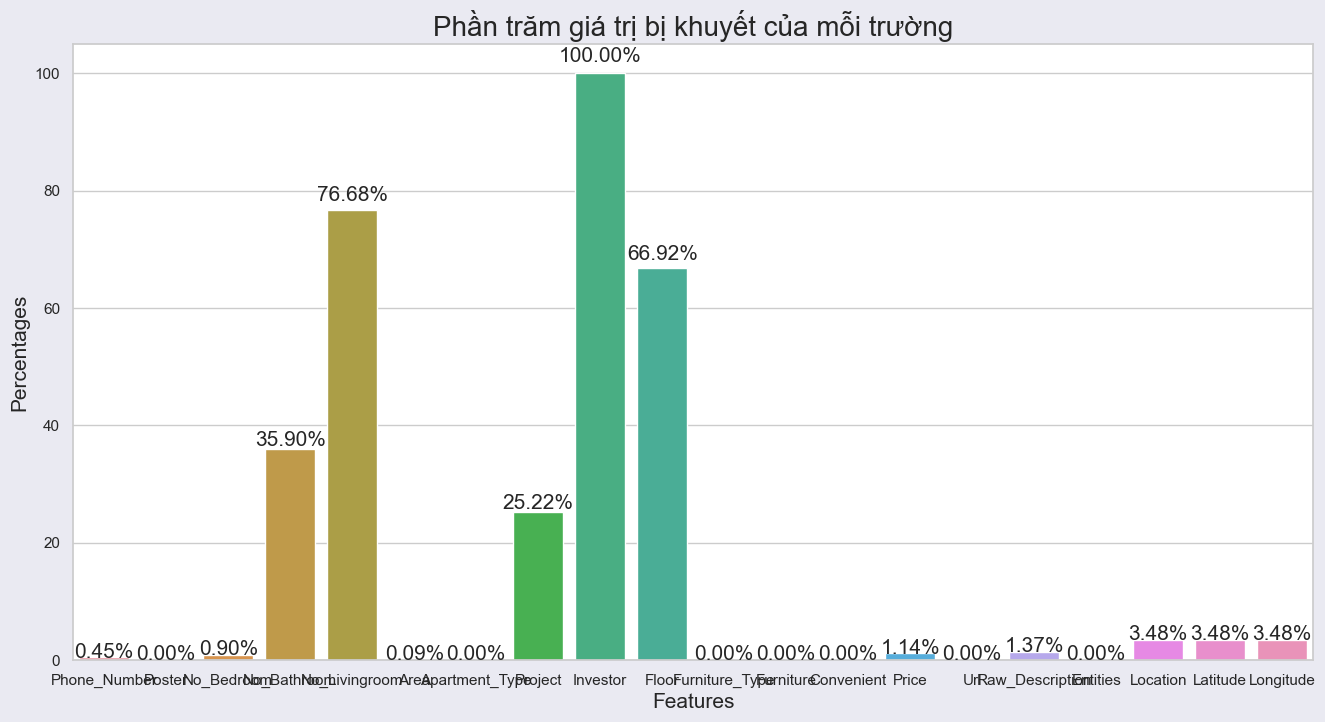

In [59]:
def missing_percent(df):
    nan_percent = 100*(df.isnull().sum()/len(df))
    # nan_percent = nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['INVESTOR', 'PHONE_NUMBER', 'RAW_DESCRIPTION', 'FORMATTED_LOCATION', 'FURNITURE', 'CONVENIENT', 'ENTITIES', 'URL']:
    bar_x.append(x[0])
    bar_y.append(x[1])

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Phần trăm giá trị bị khuyết của mỗi trường', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

## Remove rows that have nan value in some columns as: AREA, BEDROOM_NUMBER, PRICE, LATITUDE, LONGTITUDE

In [34]:
df.dropna(axis=0, subset=['BEDROOM_NUMBER', 'AREA', 'PRICE', 'LATITUDE', 'LONGITUDE'], inplace=True)

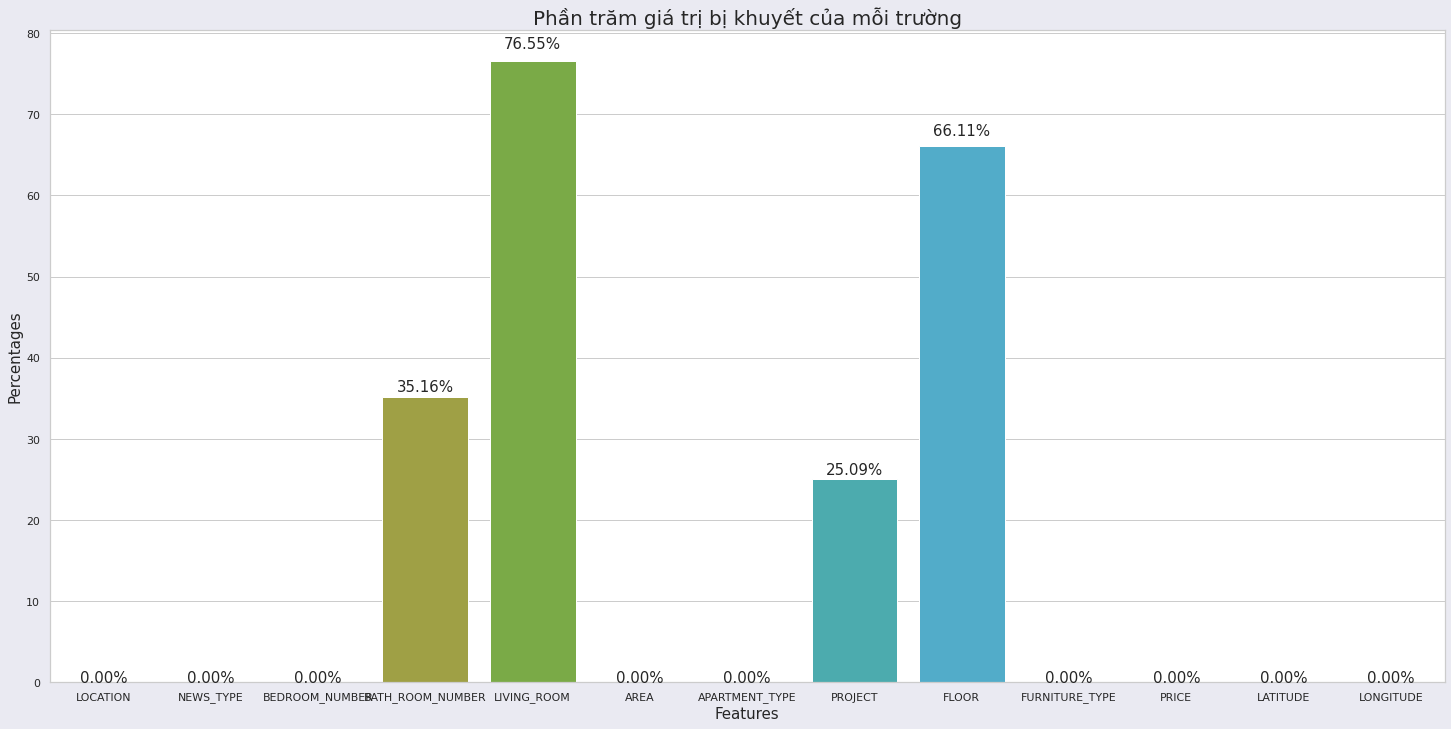

In [35]:
def missing_percent(df):
    nan_percent = 100*(df.isnull().sum()/len(df))
    # nan_percent = nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['INVESTOR', 'PHONE_NUMBER', 'RAW_DESCRIPTION', 'FORMATTED_LOCATION', 'FURNITURE', 'CONVENIENT', 'ENTITIES', 'URL']:
    bar_x.append(x[0])
    bar_y.append(x[1])

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(25, 12), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Phần trăm giá trị bị khuyết của mỗi trường', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

# Drop unuseful column

In [36]:
dropped_df = df.drop(
    columns=['PHONE_NUMBER', 'PROJECT', 'INVESTOR', 'FLOOR', 'RAW_DESCRIPTION', 'LOCATION', 'URL', 'ENTITIES',
             'CONVENIENT', 'FORMATTED_LOCATION', 'CONVENIENT', 'FURNITURE', 'LIVING_ROOM'])

In [37]:
dropped_df.columns

Index(['NEWS_TYPE', 'BEDROOM_NUMBER', 'BATH_ROOM_NUMBER', 'AREA',
       'APARTMENT_TYPE', 'FURNITURE_TYPE', 'PRICE', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [38]:
dropped_df.head()

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
0,môi giới,3.0,2.0,80.0,chung cư tập thể,unk,7.5,21.041731,105.809950
1,cá nhân,2.0,1.0,48.0,chung cư thường,unk,7.5,21.008615,105.834091
2,cá nhân,1.0,1.0,40.0,chung cư tập thể,unk,5.0,20.999548,105.860602
3,môi giới,1.0,1.0,30.0,chung cư studio,full,4.5,21.032594,105.808742
4,môi giới,1.0,1.0,30.0,chung cư thường,full,4.5,21.033861,105.809472


In [56]:
len(dropped_df)

16462

# Unvariate Outlier Detection

## Price

Text(0.5, 1.0, 'Box plot of price')

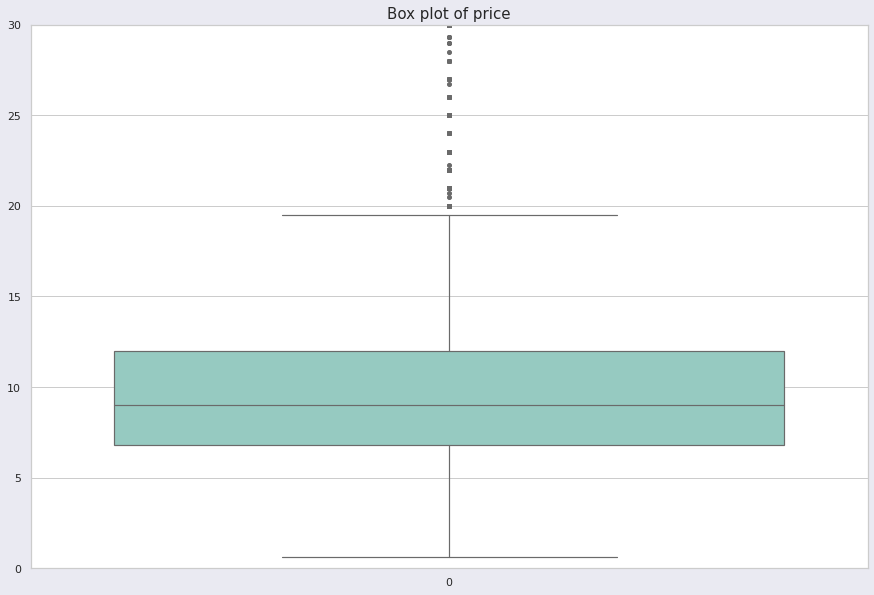

In [41]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)

# print(df['PRICE'].sort_values(ascending=False))

ax = sns.boxplot(data=dropped_df['PRICE'],
                 palette='Set3', 
                 linewidth=1.2, 
                 fliersize=2, 
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 30))
ax.set_title('Box plot of price', fontsize=15)

In [42]:
dropped_df.query('PRICE >= 20 & PRICE <= 50')

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
9,môi giới,3.0,2.0,118.0,chung cư thường,full,21.0,20.997276,105.867104
196,cá nhân,3.0,2.0,136.0,chung cư thường,full cao cấp,23.0,20.999558,105.814575
221,môi giới,2.0,2.0,74.0,chung cư thường,full,22.0,21.032055,105.814083
319,môi giới,3.0,2.0,115.0,chung cư thường,full cao cấp,20.0,20.999773,105.814532
343,cá nhân,3.0,3.0,220.0,chung cư thường,full,46.0,21.011068,105.849483
...,...,...,...,...,...,...,...,...,...
16697,môi giới,3.0,NaN,130.0,chung cư thường,full cao cấp,25.0,21.030065,105.822659
16808,môi giới,2.0,NaN,115.0,chung cư thường,full,23.0,21.004945,105.798086
16814,môi giới,3.0,2.0,130.0,chung cư thường,full,25.0,21.000560,105.802918


In [43]:
# Remove data points that have null price values or outlier values
dropped_df = dropped_df[~dropped_df['PRICE'].isnull()]

In [44]:
dropped_df = dropped_df.loc[dropped_df['PRICE'] <= 50]

In [45]:
len(dropped_df)

16423

## Bedroom Number

Text(0.5, 1.0, 'Box plot of bedroom number')

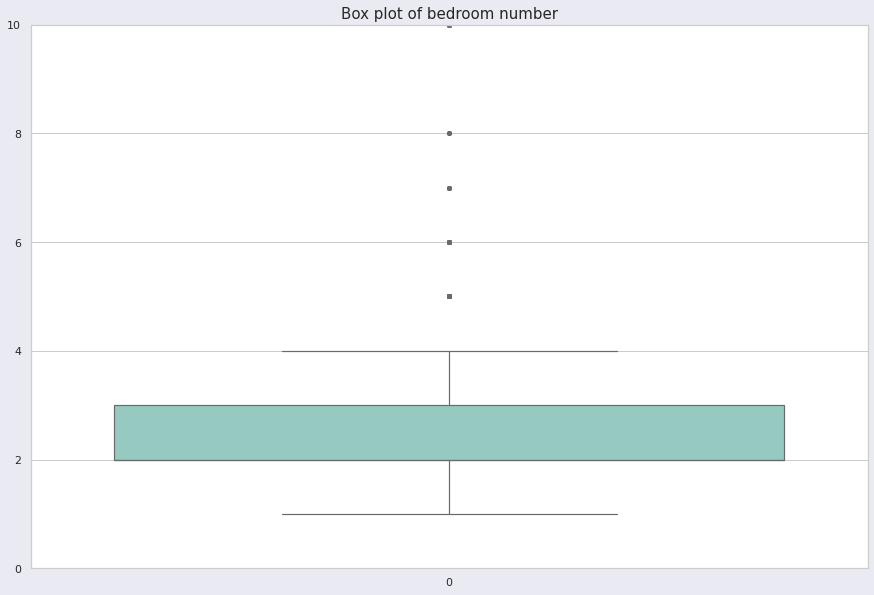

In [46]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)

# print(df['PRICE'].sort_values(ascending=False))

ax = sns.boxplot(data=dropped_df['BEDROOM_NUMBER'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 10))
ax.set_title('Box plot of bedroom number', fontsize=15)

In [47]:
dropped_df.query('BEDROOM_NUMBER > 4')

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
127,cá nhân,5.0,5.0,30.0,chung cư mini,full,3.8,21.010676,105.799562
173,cá nhân,5.0,3.0,40.0,chung cư cao cấp,unk,13.0,21.015913,105.805565
426,cá nhân,5.0,4.0,125.0,chung cư thường,unk,6.5,20.985680,105.813799
447,cá nhân,5.0,4.0,295.0,chung cư thường,full cao cấp,48.0,21.085260,105.816961
529,môi giới,10.0,6.0,28.0,chung cư thường,unk,3.3,21.040643,105.764709
...,...,...,...,...,...,...,...,...,...
16714,môi giới,401.0,NaN,30.0,chung cư thường,unk,7.5,21.042720,105.824155
16775,môi giới,203.0,NaN,30.0,chung cư thường,full,7.0,21.031160,105.786344
16776,môi giới,502.0,NaN,62.0,chung cư thường,unk,14.5,21.013723,105.839630


In [48]:
dropped_df = dropped_df[~dropped_df['BEDROOM_NUMBER'].isnull()]
dropped_df = dropped_df.loc[dropped_df['BEDROOM_NUMBER'] <= 4]

In [101]:
len(dropped_df)

15840

## Area

Text(0.5, 1.0, 'Box plot of Area')

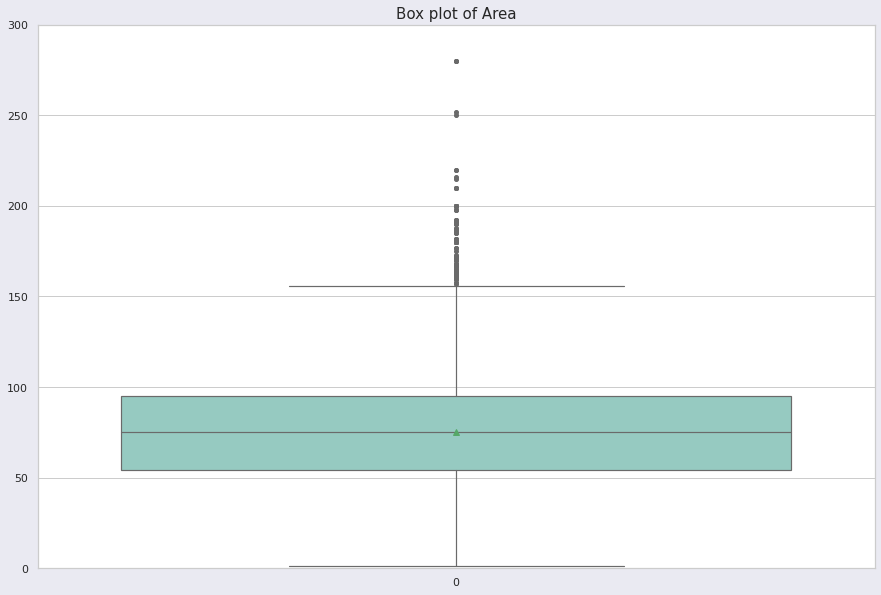

In [49]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)

ax = sns.boxplot(data=dropped_df['AREA'],
                 palette='Set3', 
                 linewidth=1.2, 
                 fliersize=2, 
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 300))
ax.set_title('Box plot of Area', fontsize=15)

In [50]:
dropped_df['AREA'].max()

826.0

In [51]:
dropped_df.query('AREA >= 150 & AREA <= 300')

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
169,môi giới,4.0,3.0,182.0,chung cư thường,full,14.0,21.030229,105.776573
343,cá nhân,3.0,3.0,220.0,chung cư thường,full,46.0,21.011068,105.849483
358,môi giới,3.0,2.0,150.0,chung cư thường,unk,16.0,21.017006,105.815086
372,môi giới,4.0,3.0,192.0,chung cư thường,full,17.0,21.030229,105.776573
671,môi giới,3.0,2.0,150.0,chung cư thường,full,25.0,21.076870,105.814871
...,...,...,...,...,...,...,...,...,...
16538,môi giới,4.0,NaN,177.0,chung cư thường,unk,48.0,21.057969,105.797542
16587,môi giới,4.0,NaN,210.0,chung cư thường,full,20.0,21.033392,105.797774
16619,môi giới,4.0,NaN,198.0,chung cư thường,unk,18.0,21.033102,105.778822


In [52]:
dropped_df.query('AREA > 300')

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
558,môi giới,2.0,1.0,445.0,chung cư mini,unk,5.0,21.036819,105.780847
11475,môi giới,2.0,NaN,826.0,chung cư thường,unk,12.0,20.997276,105.867104


In [53]:
# Remove data points that have null area values or outlier values
dropped_df = dropped_df[~dropped_df['AREA'].isnull()]
dropped_df = dropped_df.loc[dropped_df['AREA'] <= 300]
dropped_df = dropped_df.loc[dropped_df['AREA'] >= 15]

In [56]:
dropped_df.drop([2471, 13377, 13378], inplace=True)

In [57]:
len(dropped_df)

15840

# Visualize relation of some attributes

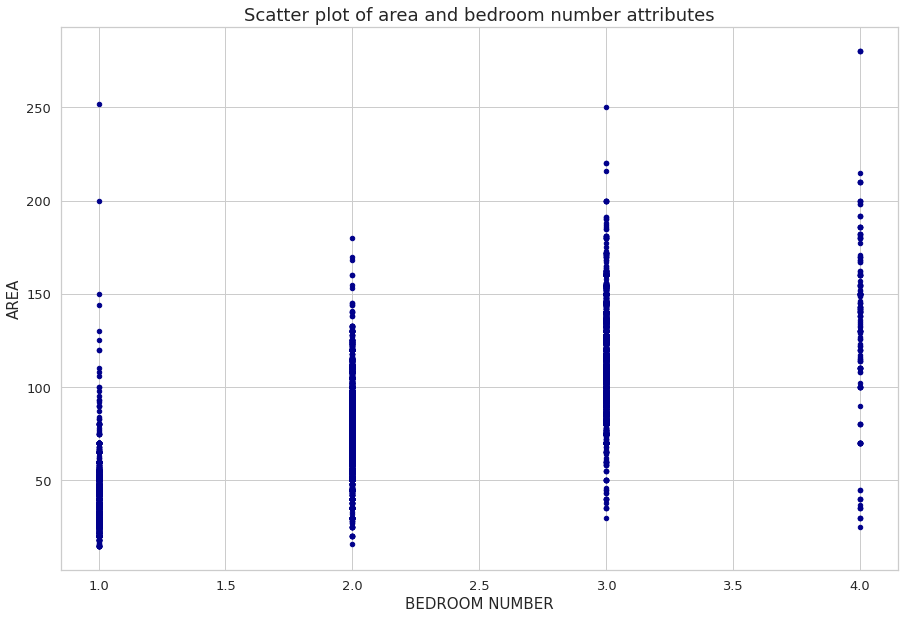

In [67]:
dropped_df.plot.scatter(x='BEDROOM_NUMBER', y='AREA', c='DarkBlue', figsize=(15, 10))
plt.title('Scatter plot of area and bedroom number attributes', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('BEDROOM NUMBER', fontsize=15)
plt.ylabel('AREA', fontsize=15)
plt.show()

In [109]:
dropped_df.query('AREA < 20')

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
703,cá nhân,1.0,1.0,15.0,chung cư thường,unk,1.7,21.020996,105.821868
905,cá nhân,1.0,1.0,17.0,chung cư tập thể,unk,4.0,21.019205,105.858294
1254,cá nhân,1.0,1.0,16.0,chung cư thường,unk,1.6,21.000549,105.828985
1390,cá nhân,1.0,1.0,18.0,chung cư tập thể,full,2.5,21.004140,105.830558
1541,cá nhân,1.0,1.0,16.0,chung cư thường,full,3.0,21.007936,105.834825
1891,cá nhân,1.0,1.0,15.0,chung cư thường,unk,2.7,21.008831,105.863238
1953,cá nhân,1.0,1.0,15.0,chung cư thường,full,2.7,21.008831,105.863238
2344,môi giới,1.0,1.0,15.0,chung cư mini,unk,1.3,20.994410,105.807572
2795,môi giới,1.0,1.0,18.0,chung cư thường,unk,3.0,21.012028,105.792313


In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data = dropped_df[["AREA", "PRICE"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of area and price attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [75]:
def IQR_bounds(dataframe, column_name, multiple):
    """Extract the upper and lower bound for outlier detection using IQR

    Input:
        dataframe: Dataframe you want to extract the upper and lower bound from
        column_name: column name you want to extract upper and lower bound for
        multiple: The multiple to use to extract this

    Output:
        lower_bound = lower bound for column
        upper_bound = upper bound for column"""

    #extract the quantiles for the column
    lower_quantile = dataframe[column_name].quantile(0.25)
    upper_quantile = dataframe[column_name].quantile(0.75)
    #cauclat IQR
    IQR = upper_quantile - lower_quantile

    #extract lower and upper bound
    lower_bound = lower_quantile - multiple * IQR
    upper_bound = upper_quantile + multiple * IQR

    #retrun these values
    return lower_bound, upper_bound
#set the columns we want
columns = ["AREA", "PRICE"]
#create a dictionary to store the bounds
column_bounds = {}
#iteratre over each column to extract bounds
for column in columns:
    #extract normal and extreme bounds
    lower_bound, upper_bound =  IQR_bounds(dropped_df, column, 1.5)
    #send them to the dictionary
    column_bounds[column] = [lower_bound, upper_bound]
#create the normal dataframe
data_IQR_AD = dropped_df[(dropped_df["AREA"] < column_bounds["AREA"][0]) |
                         (dropped_df["AREA"] > column_bounds["AREA"][1]) |
                         (dropped_df["PRICE"] < column_bounds["PRICE"][0]) |
                         (dropped_df["PRICE"] > column_bounds["PRICE"][1])
                        ]

In [76]:
dropped_df['IS_OUTLIER'] = 0

In [77]:
classified_data = dropped_df

In [79]:
classified_data.loc[(dropped_df["AREA"] < column_bounds["AREA"][0]) |
                    (dropped_df["AREA"] > column_bounds["AREA"][1]) |
                    (dropped_df["PRICE"] < column_bounds["PRICE"][0]) |
                    (dropped_df["PRICE"] > column_bounds["PRICE"][1]), 'IS_OUTLIER'] = 1

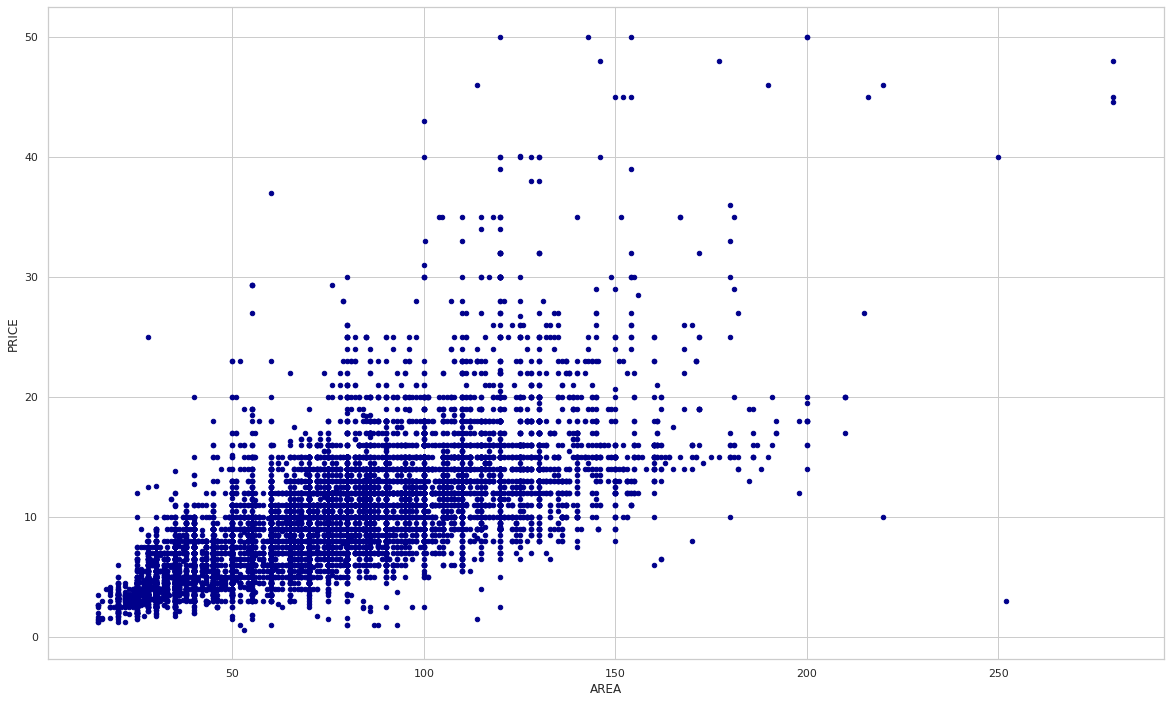

In [110]:
dropped_df.plot.scatter(x='AREA', y='PRICE', c='DarkBlue', figsize=(20, 12))
plt.title('Scatter plot of area and bedroom number attributes', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('BEDROOM NUMBER', fontsize=15)
plt.ylabel('AREA', fontsize=15)
plt.show()

# Correlation and describe

In [112]:
# df_float = df.loc[df['BEDROOM_NUMBER'] != 'no information']
# df_float = df_float.loc[df_float['LIVING_ROOM'] != 'no information']
# df_float = df_float.loc[df_float['BATH_ROOM_NUMBER'] != 'no information']
dropped_df['BEDROOM_NUMBER'] = dropped_df['BEDROOM_NUMBER'].astype("float")
# dropped_df['LIVING_ROOM'] = dropped_df['LIVING_ROOM'].astype("float")
dropped_df['BATH_ROOM_NUMBER'] = dropped_df['BATH_ROOM_NUMBER'].astype("float")

In [114]:
non_num_cols = [col for col in dropped_df.columns if dropped_df[col].dtype == 'O']
non_num_data = dropped_df[non_num_cols]

In [115]:
num_cols = list(set(dropped_df.columns) - set(non_num_cols))
num_cols

['PRICE',
 'LONGITUDE',
 'AREA',
 'BEDROOM_NUMBER',
 'BATH_ROOM_NUMBER',
 'LATITUDE']

In [116]:
df_num = dropped_df[num_cols]
df_num.describe()

,PRICE,LONGITUDE,AREA,BEDROOM_NUMBER,BATH_ROOM_NUMBER,LATITUDE
count,15840.000000,15840.000000,15840.000000,15840.000000,10588.000000,15840.000000
mean,9.820195,105.785875,75.500434,2.016793,1.542501,21.008496
std,4.700540,2.419123,31.029290,0.717919,0.536904,0.436223
min,0.625000,-123.144252,15.000000,1.000000,1.000000,10.224782
25%,6.800000,105.783450,54.000000,2.000000,1.000000,21.000468
50%,9.000000,105.803384,75.000000,2.000000,2.000000,21.016493
75%,12.000000,105.822659,95.000000,2.000000,2.000000,21.033369
max,50.000000,109.157551,280.000000,4.000000,5.000000,49.304258


In [118]:
dropped_df.corr()

,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,PRICE,LATITUDE,LONGITUDE
BEDROOM_NUMBER,1.000000,0.607507,0.818387,0.555821,-0.001116,-0.001032
BATH_ROOM_NUMBER,0.607507,1.000000,0.621433,0.483314,0.003815,-0.009933
AREA,0.818387,0.621433,1.000000,0.693963,0.007415,-0.002243
PRICE,0.555821,0.483314,0.693963,1.000000,0.016742,-0.005167
LATITUDE,-0.001116,0.003815,0.007415,0.016742,1.000000,-0.597699
LONGITUDE,-0.001032,-0.009933,-0.002243,-0.005167,-0.597699,1.000000


# Visualize

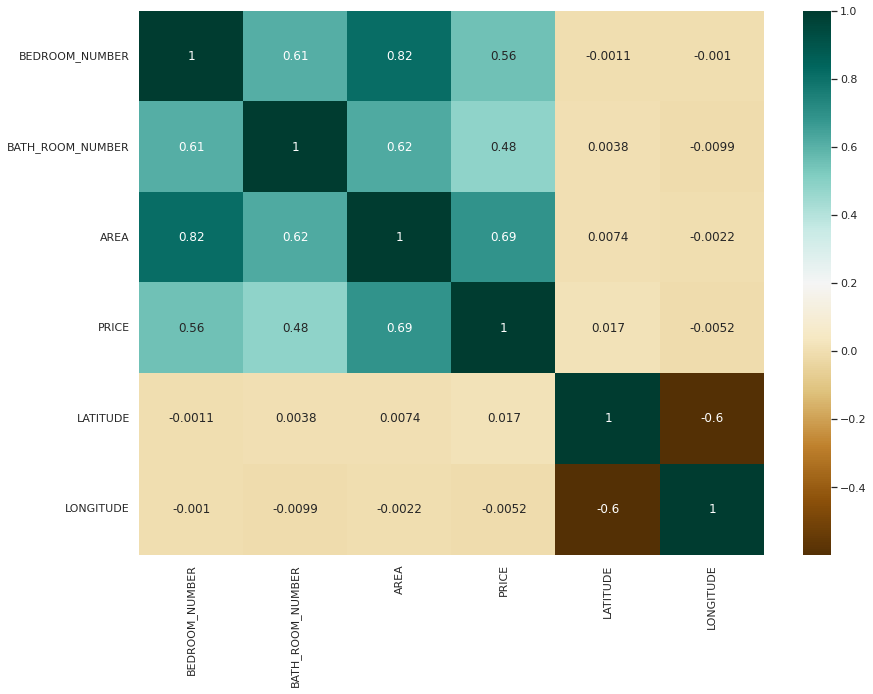

In [119]:
plt.figure(figsize = (14,10))
g = sns.heatmap(dropped_df.corr(), cmap = 'BrBG', annot = True)

Giá căn hộ môi giới trung bình:  11.325000596516345
Giá căn hộ cá nhân trung bình:  10.01840579710145


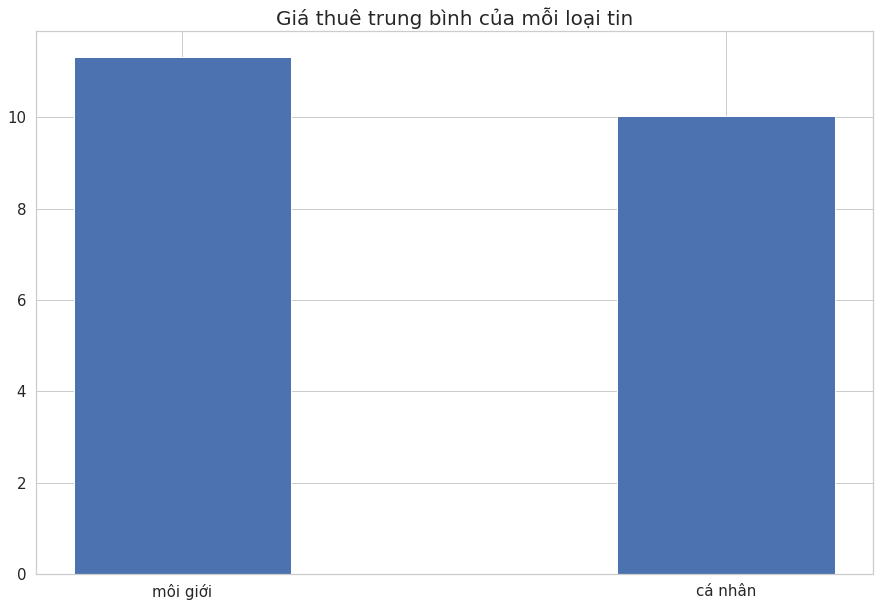

In [94]:
moi_gioi = dropped_df.loc[dropped_df['NEWS_TYPE'] == 'môi giới']['PRICE'].mean()
ca_nhan = dropped_df.loc[dropped_df['NEWS_TYPE'] == 'cá nhân']['PRICE'].mean()
print('Giá căn hộ môi giới trung bình: ', moi_gioi)
print('Giá căn hộ cá nhân trung bình: ', ca_nhan)

# sns.set(style='whitegrid')
# facecolor = '#eaeaf2'
plt.figure(figsize=(15, 10))
plt.bar(['môi giới', 'cá nhân'], [moi_gioi, ca_nhan], width=0.4)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Giá thuê trung bình của mỗi loại tin', fontsize=20)
plt.show()

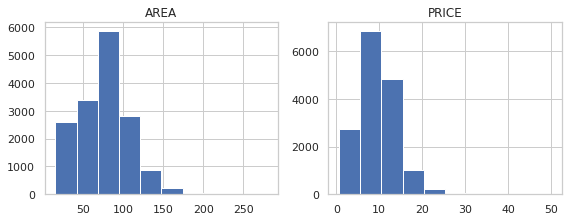

In [122]:
dropped_df[['AREA', 'PRICE']].hist(layout = (7,3), figsize = (12, 20))
plt.tight_layout()

[(105.7, 106.0)]

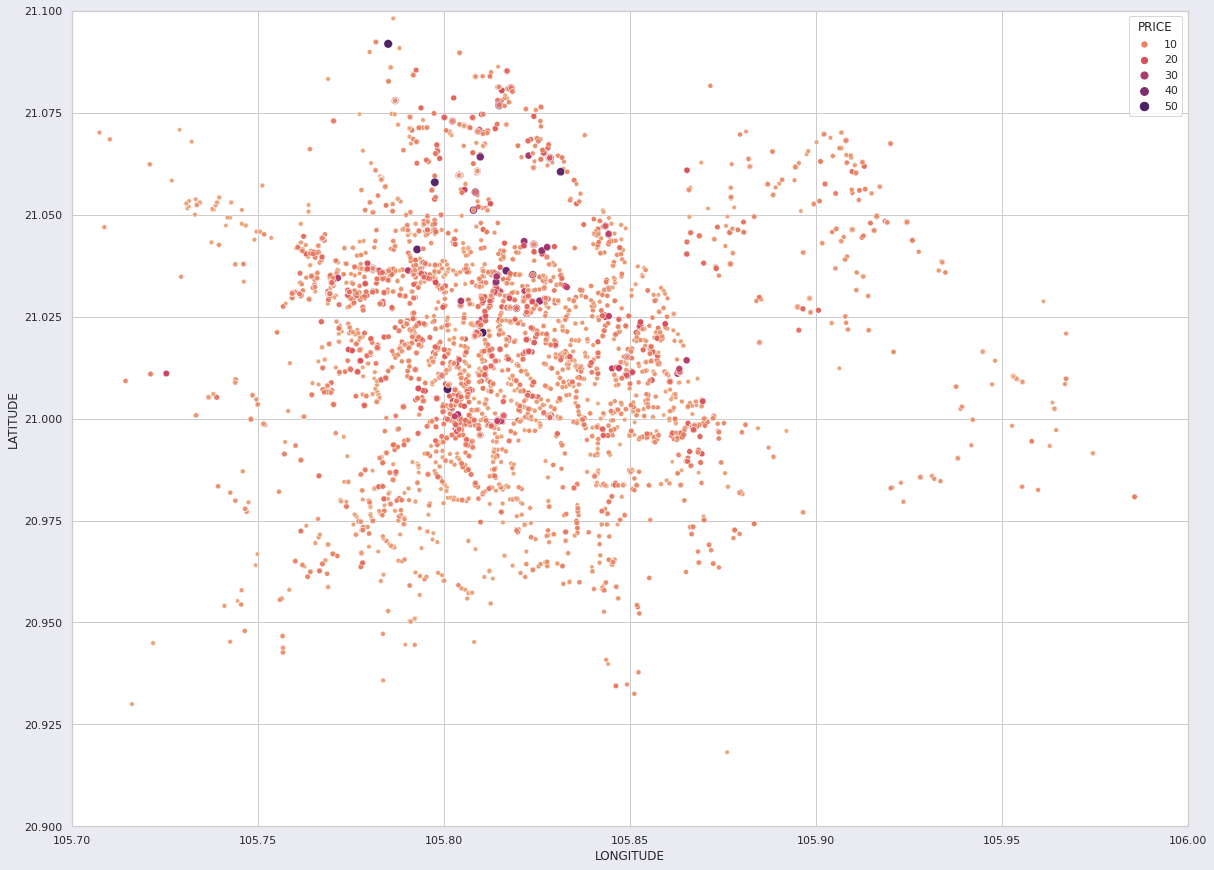

In [130]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 15), facecolor=facecolor)

# ax = sns.scatterplot(x=dropped_df['LATITUDE'], y=dropped_df['LONGITUDE'], hue=dropped_df['PRICE'], palette='winter')
ax = sns.scatterplot(data=dropped_df, x='LONGITUDE', y='LATITUDE', hue='PRICE', size='PRICE', palette='flare')
ax.set(ylim=(20.9,21.1))
ax.set(xlim=(105.7,106))

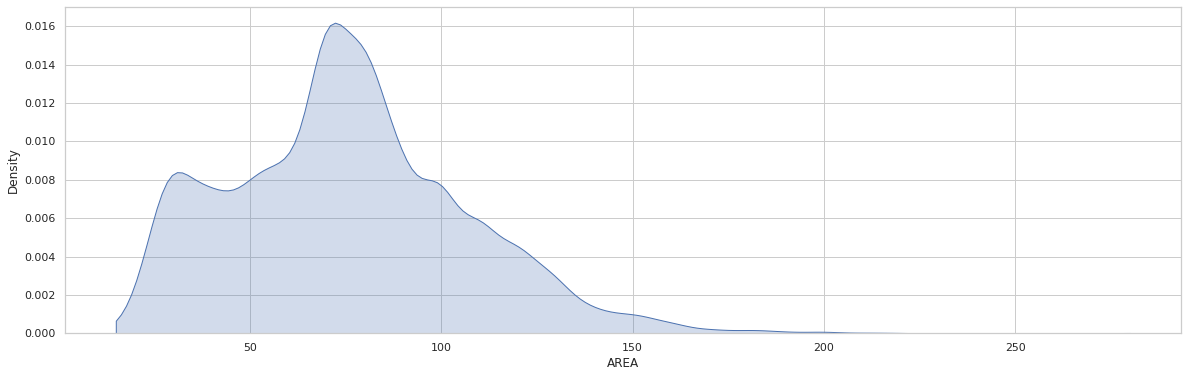

In [131]:
#histogram
# KDE plot
fig, ax = plt.subplots(figsize = (20,6))
ax = sns.kdeplot(data=dropped_df['AREA'], shade=True, clip=(min(dropped_df['AREA']), max(dropped_df['AREA'])))

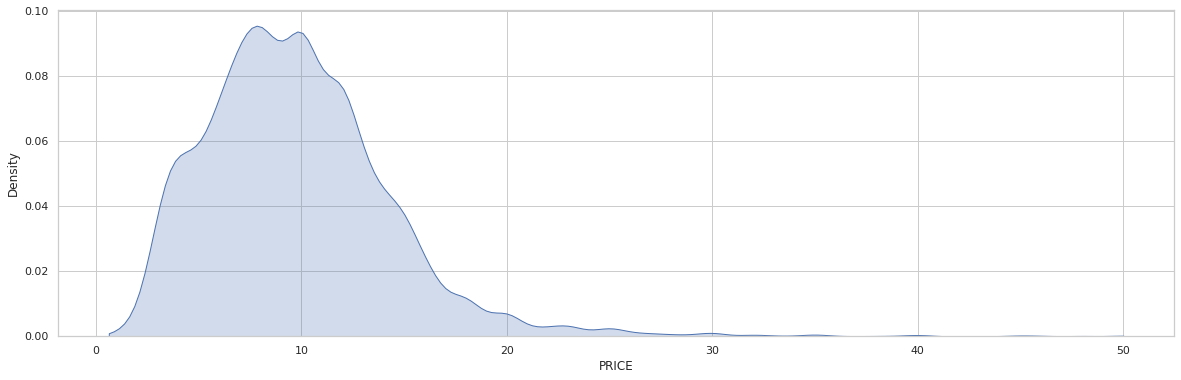

In [132]:
#histogram
# KDE plot
fig, ax = plt.subplots(figsize = (20,6))
ax = sns.kdeplot(data=dropped_df['PRICE'], shade=True, clip=(min(dropped_df['PRICE']), max(dropped_df['PRICE'])))

In [134]:
dropped_df.to_csv('../table_data/cleaned_data.csv')

In [135]:
len(dropped_df)

15840